In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #hello

In [42]:
df1 = pd.read_csv('customer_churn_dataset-training-master.csv')
df2 = pd.read_csv('customer_churn_dataset-testing-master.csv')
dfs = [df1, df2]
df = pd.concat(dfs)

In [43]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
64370,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
64371,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
64372,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


In [44]:
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [45]:
df['Churn'].value_counts()

1.0    280492
0.0    224714
Name: Churn, dtype: int64

In [46]:
df.duplicated().value_counts()

False    505207
dtype: int64

In [47]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


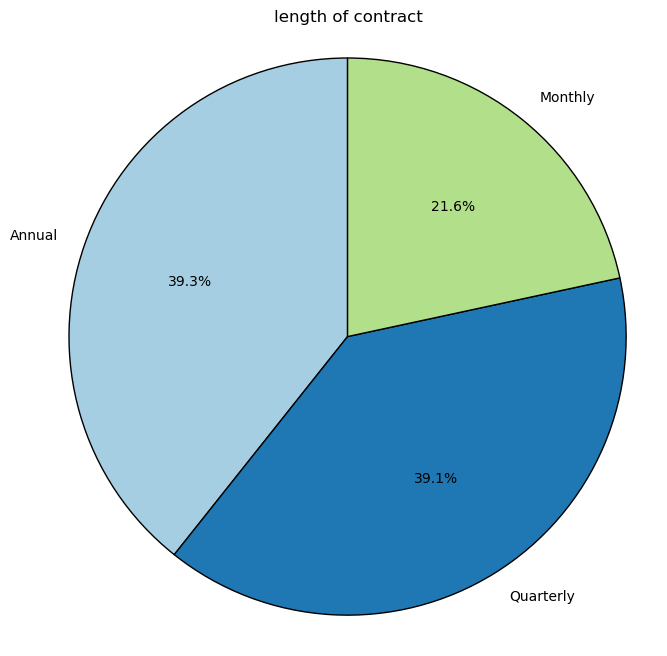

In [48]:
# Count the occurrences of each device type
device_counts = df['Contract Length'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(device_counts.values, labels=device_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})

# Set title
plt.title('length of contract')

# Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

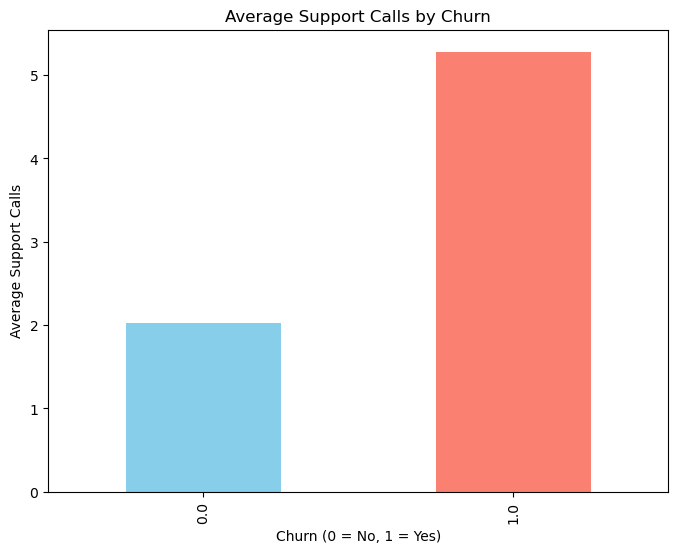

In [49]:
churn_means = df.groupby('Churn')['Support Calls'].mean()

plt.figure(figsize=(8, 6))
churn_means.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Support Calls by Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Average Support Calls')
plt.show()

In [52]:
# Function of donut chart
def create_donut(sizes, labels, ax):
    ax.pie(
        sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
        wedgeprops={'width': 0.4}  # Width controls the donut shape
    )

ValueError: 'label' must be of length 'x'

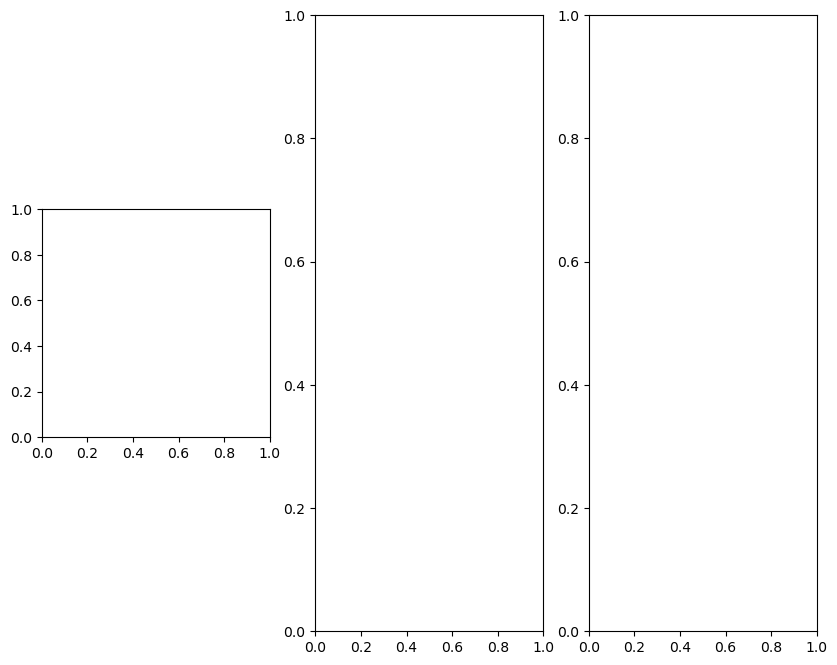

In [53]:
# Univariate Analysis of Gender 
fig, axes = plt.subplots(1, 3, figsize=(10, 8))

# Plot each donut chart
x = pd.DataFrame(df["Gender"][(df["Churn"] == 0)])
y = pd.DataFrame(df["Gender"][(df["Churn"] == 1)])
create_donut(df["Gender"].value_counts(), df["Gender"].unique(), axes[0])
create_donut(x["Gender"].value_counts(), x["Gender"].unique() , axes[1])
create_donut(y["Gender"].value_counts(), y["Gender"].unique(), axes[2])

# Set titles
axes[0].set_title('Male-Female Ratio')
axes[1].set_title('Male-Female Ratio (Not Churn)')
axes[2].set_title('Male-Female Ration (Churn)')

# Show the plots
plt.tight_layout()
plt.show()

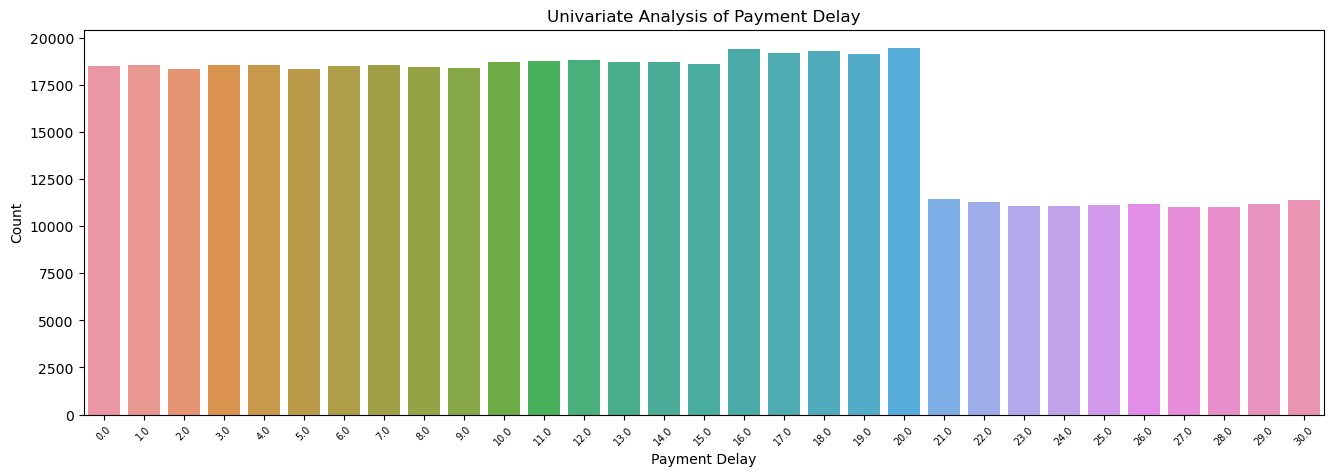

In [54]:
# Univariate Analysis of Payment Delay
plt.figure(figsize=(16,5))
ax = sns.countplot(data=df, x="Payment Delay")
plt.xticks(rotation =45,fontsize =7)
plt.title("Univariate Analysis of Payment Delay")
plt.ylabel("Count")
plt.show()

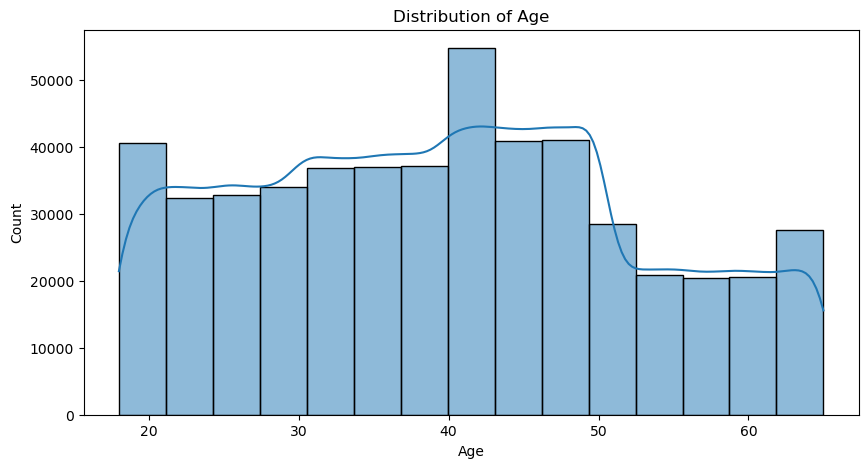

In [55]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

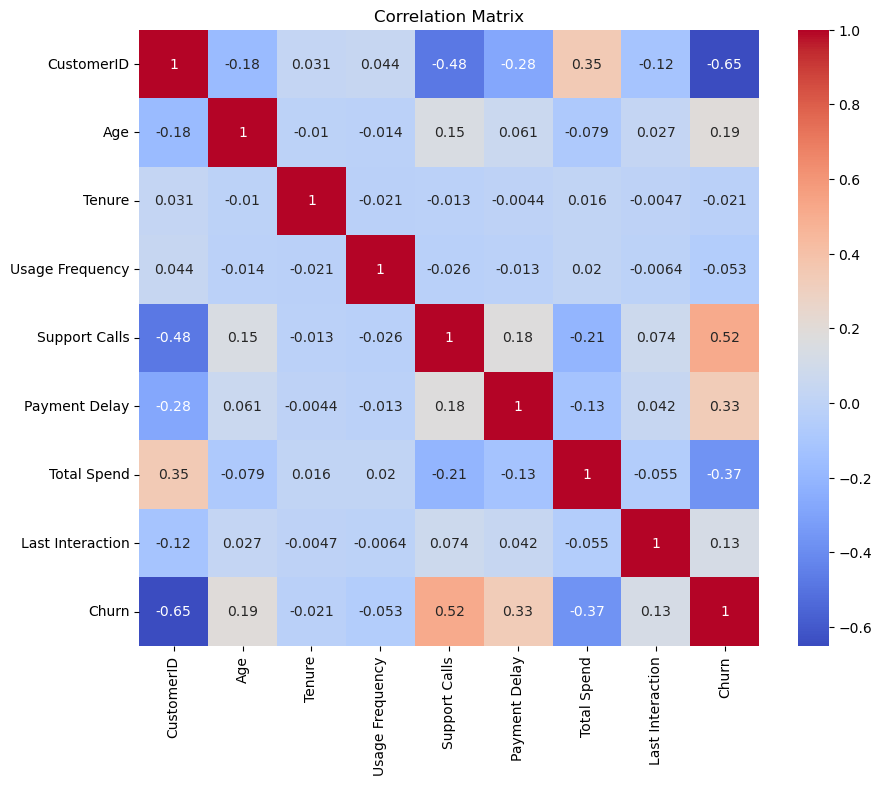

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True , cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()